In [ ]:
import os
import logging
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp
import jax

from qite.qite import qite
from qite.z2lgt_1d import hamiltonian, domain_of

os.environ['CUDA_VISIBLE_DEVICES'] = '3'
jax.config.update('jax_enable_x64', True)

logging.basicConfig(format='%(asctime)s:%(name)s:%(levelname)s %(message)s', level=logging.WARNING)
logging.getLogger('qite.qite').setLevel(logging.INFO)

In [2]:
paulis, coeffs = hamiltonian(num_sites=4, mass=0.5, coupling=1.2)
# Weight-1 Pauli gets mapped to size 3 domain, weight-3 to size 5
dom_size_conf = {1: 3, 3: 5}

# Exactly diagonalize and set the initial state as (|0> + |1>) / sqrt(2)
evals, evecs = eigsh(SparsePauliOp(paulis, coeffs).to_matrix(sparse=True), k=2, which='SA')
initial_state = (evecs[:, 0] + evecs[:, 1]) * np.sqrt(0.5)

domains = [domain_of(pauli, dom_size_conf) for pauli in paulis]
state, energies = qite(paulis, coeffs, domains, initial_state, delta_beta=0.1,
                       num_steps=40, solver_params={'solver': 'minres', 'rtol': 1.e-8})

2025-08-20 14:36:50,940:qite.qite:INFO QITE step 0
2025-08-20 14:36:58,635:qite.qite:INFO QITE step 1
2025-08-20 14:37:02,524:qite.qite:INFO QITE step 2
2025-08-20 14:37:06,239:qite.qite:INFO QITE step 3
2025-08-20 14:37:10,059:qite.qite:INFO QITE step 4
2025-08-20 14:37:13,922:qite.qite:INFO QITE step 5
2025-08-20 14:37:17,829:qite.qite:INFO QITE step 6
2025-08-20 14:37:21,349:qite.qite:INFO QITE step 7
2025-08-20 14:37:25,018:qite.qite:INFO QITE step 8
2025-08-20 14:37:28,626:qite.qite:INFO QITE step 9
2025-08-20 14:37:32,267:qite.qite:INFO QITE step 10
2025-08-20 14:37:35,951:qite.qite:INFO QITE step 11
2025-08-20 14:37:39,688:qite.qite:INFO QITE step 12
2025-08-20 14:37:43,320:qite.qite:INFO QITE step 13
2025-08-20 14:37:46,803:qite.qite:INFO QITE step 14
2025-08-20 14:37:50,508:qite.qite:INFO QITE step 15
2025-08-20 14:37:54,530:qite.qite:INFO QITE step 16
2025-08-20 14:37:58,015:qite.qite:INFO QITE step 17
2025-08-20 14:38:01,782:qite.qite:INFO QITE step 18
2025-08-20 14:38:05,45

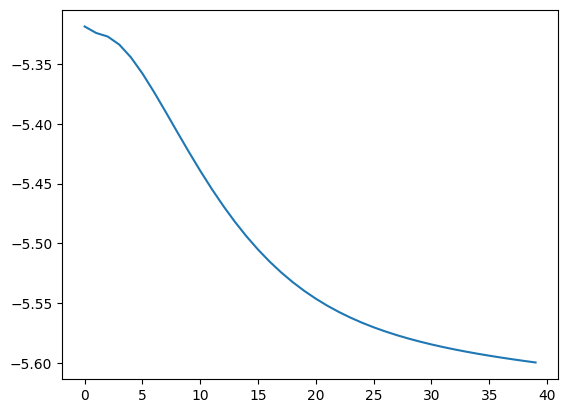

In [4]:
plt.plot(energies)